## Notebook B 

En este segundo *notebook* analizaremos los datos relativos a la *"Speculation Watch List"* o Lista de Vigilancia Especulativa de la ciudad de Nueva York.

Esta lista incluye viviendas con alquileres regulados que se han vendido a precios muy superiores a los esperados, lo que puede indicar que los nuevos propietarios pueden subir los alquileres, reducir los servicios o forzar la salida de los inquilinos de alquiler regulado para rentabilizar su inversión. Los edificios incluidos en esta lista poseen tasas de capitalización más bajas que la media de cada distrito o *borough* (lo cual significa que los beneficios del edificio no compensan el precio de compra).

Fuente del dataset:
https://data.cityofnewyork.us/Housing-Development/Speculation-Watch-List/adax-9mit

#### Carga de los datos

In [16]:
import numpy as np

#empleamos la codificación 'utf-8' para poder visualizar correctamente los carácteres especiales.
#con "usecols = 23" descartamos el uso de la columna "Location1" ya que esta variable no será utilizada.
speculation = np.genfromtxt('data/Speculation_Watch_List.csv', delimiter=',', skip_header=1, dtype = str, encoding='utf-8', usecols=np.arange(0,23))

print(speculation.shape) #comprobamos su estructura o forma.
print(type(speculation)) #vemos que es un array de numpy.


(534, 23)
<class 'numpy.ndarray'>


#### PRIMER INDICADOR

En primer lugar, vamos a ordenar de mayor a menor (orden descendente) el precio de las viviendas compradas durante el segundo trimestre de 2022 (2022Q2) que están incluidas en esta lista.

In [17]:
#filtramos la columna "yearqtr" para poder obtener los datos más recientes del año 2022.

filtro1 = np.asarray(['2022Q2'])
#la función "np.in1d" permite comprobar si un elemento de un array está presente en otro.
arrayfiltrado1 = speculation[np.in1d(speculation[:, 14], filtro1)] 

arrayfiltrado1 = np.delete(arrayfiltrado1, slice(12,23), 1) #eliminamos el resto de las columnas que aparecen después de la columna "price" para 
#facilitar la lectura de los datos.

precio = arrayfiltrado1[arrayfiltrado1[:, 11].astype(int).argsort()][::-1] #ordenamos de mayor a menor los datos según el precio de las viviendas.
#[::-1] se utiliza para invertir el orden del array. Finalmente, obtenemos un array ordenado con los edificios ordenados de mayor a menor precio. 
print(precio)


[['"MN' '1' '1244' '90' '1012440090' '98' '99' 'RIVERSIDE DRIVE'
  '2022000213692' '98 RIVERSIDE CO. LLC' '05/09/2022' '90000000']
 ['"MN' '1' '1868' '1' '1018680001' '740' '740' 'WEST END AVENUE'
  '2022000278108' 'TARGAM NY LLC' '06/30/2022' '50750000']
 ['"BK' '3' '2371' '34' '3023710034' '487' '487' 'KEAP STREET'
  '2022000242394' 'KEAP MANOR LLC' '06/02/2022' '36300000']
 ['"BX' '2' '3982' '1' '2039820001' '2501' '2509' 'TRATMAN AVENUE'
  '2022000208808' 'TRATMAN GARDENS LLC' '05/03/2022' '19900000']
 ['"MN' '1' '1065' '44' '1010650044' '418' '424' 'WEST 56 STREET'
  '2022000204211' '418-424W56 OWNER LLC' '05/13/2022' '19000000']
 ['"MN' '1' '540' '23' '1005400023' '100' '100' 'WEST 3 STREET'
  '2022000245275' '240 SULL LLC' '06/01/2022' '17000000']
 ['"BX' '2' '3324' '11' '2033240011' '75' '' 'W MOSHOLU PARKWAY N'
  '2022000255776' '1260 SHAKESPEARE GROUP LLC' '06/01/2022' '16000000']
 ['"BX' '2' '4238' '27' '2042380027' '3120' '3120' 'WILKINSON AVENUE'
  '2022000191736' 'SHABAN 

#### SEGUNDO INDICADOR

Una vez ordenados los precios de las viviendas de mayor a menor, queremos averiguar cuántos edificios incluidos en la *"Speculation Watch List"* se han vendido en Nueva York según el *borough* o distrito donde se sitúa dicha propiedad para el segundo trimestre de 2022.

In [18]:
#buscamos los valores únicos en la primera columna del array ("borough").
frecuencia = np.unique(precio[:,0], return_counts=True)
print(frecuencia) 

(array(['"BK', '"BX', '"MN', '"QN', '"SI'], dtype='<U73'), array([14, 16,  7,  3,  1], dtype=int64))


Por tanto, en Brooklyn se han vendido 14 propiedades de este tipo, en El Bronx unas 16, unas 7 en Manhattan, 3 en Queens y 1 en Staten Island.

#### TERCER INDICADOR

Dada la importancia de la tasa de capitalización (*capitalization rate*) para determinar si una compra de edificios entra en la *"Speculation Watch List"*, vamos a calcular la diferencia entre el `cap_rate` y el `borough_cap_rate` (tasa de capitalización promedio del distrito donde se encuentra la vivienda). En este caso, para dar continuidad a lo realizado anteriormente, volvemos a utilizar los datos del segundo trimestre de 2022.

In [19]:
#filtramos los datos de ventas pertenecientes al segundo trimestre de 2022.
filtro3 = np.asarray(['2022Q2'])
arrayfiltrado3 = speculation[np.in1d(speculation[:, 14], filtro3)]

#creamos un array nuevo con cada columna
cap_rate = arrayfiltrado3[:,12].astype(float)
borough_cap_rate = arrayfiltrado3[:,13].astype(float)

#restamos los arrays anteriores para obtener la diferencia entre la tasa de capitalización media del distrito y 
#la tasa de capitalización de la vivienda sospechosa de haber sido comprada con fines especulativos
array_diferencia = np.subtract(borough_cap_rate, cap_rate)
print(array_diferencia)


[0.017 0.016 0.013 0.013 0.01  0.013 0.012 0.006 0.006 0.019 0.007 0.001
 0.009 0.006 0.015 0.025 0.006 0.009 0.002 0.013 0.01  0.005 0.009 0.009
 0.001 0.008 0.014 0.018 0.007 0.005 0.008 0.005 0.003 0.017 0.011 0.007
 0.02  0.022 0.007 0.003 0.013]


Como era de esperar, obtenemos que la capitalización media de las viviendas dentro de la *"Speculation Watch List"* es siempre inferior a la capitalización media del distrito donde se encuentran (no habrá ningún valor negativo en el array resultante).

#### CUARTO INDICADOR

Finalmente, vamos a realizar un boxplot de la diferencia entre el `cap_rate`y el `borough_cap_rate` (tasa de capitalización promedio del distrito). Esta representación gráfica nos permitirá darnos una idea intuitiva de dónde se sitúan la mediana, los cuartiles y los valores atípicos.

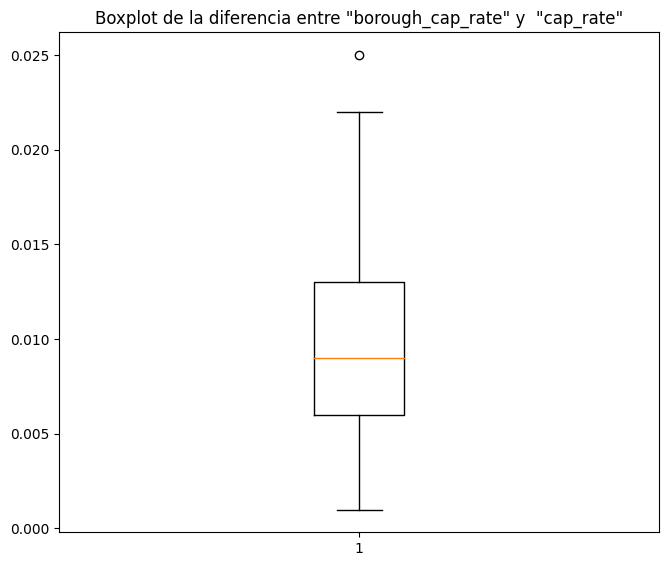

La mediana es de: 0.009000000000000001
El primer cuartil presenta un valor de: 0.006000000000000005
El tercer cuartil presenta un valor de: 0.013000000000000005


In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Boxplot de la diferencia entre "borough_cap_rate" y  "cap_rate"')
boxplot_diferencia_cap_rate = ax.boxplot(array_diferencia)
plt.show()

#adicionalmente, calculamos la mediana (línea naranja en el gráfico inferior)
mediana = np.median(array_diferencia, axis=0)
print("La mediana es de: " + str(mediana))

#calculamos el primer cuartil (línea inferior de la caja)
q1 = np.quantile(array_diferencia, 0.25)
print("El primer cuartil presenta un valor de: " + str(q1))

#calculamos el tercer cuartil (línea superior de la caja)
q3 = np.quantile(array_diferencia, 0.75)
print("El tercer cuartil presenta un valor de: " + str(q3))



Como observación final, podemos decir que la diferencia entre tasas de capitalización no llega a ser en la mayoría de casos superior al 1%. Debido a esto, podemos concluir que resultará difícil afirmar que una vivienda ha sido comprada con fines especulativos fijándonos solamente en la tasa de capitalización (pese a la importancia de este ratio, se deben analizar más indicadores o criterios para poder incluir una vivienda en la *"Speculation Watch List"*).